# <b> Handwritten Digit Recognition </b>

## Importing Necessary Libraries

Before we begin, let's import the necessary libraries for our project:

- 'numpy' as 'np': For numerical computations.
- 'matplotlib.pyplot' as 'plt: For data visualization.
- 'tensorflow' as 'tf': For building and training deep learning models.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Loading the MNIST Dataset

Before we proceed, let's load the MNIST dataset. MNIST is a classic dataset of handwritten digits, commonly used for training various image classification algorithms.

We'll use the `tf.keras.datasets.mnist` module to load the dataset. It consists of a training set of 60,000 examples and a test set of 10,000 examples, each image being 28x28 pixels.

We'll then split the dataset into training and testing sets, along with their corresponding labels.


In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Preprocessing: Normalizing the Data

Before training our model, it's essential to preprocess the data. One common preprocessing step for image data is normalization. Normalization ensures that each feature (pixel in this case) has a similar scale, which can help improve convergence during training.

Here, we'll normalize the pixel values of the training and testing sets using `tf.keras.utils.normalize` along the axis 1, which corresponds to normalizing each image independently.


In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Building the Neural Network Model

Now, let's define our neural network model architecture using TensorFlow's Keras API. We'll create a sequential model, which allows us to stack layers sequentially.

1. **Flatten Layer**: This layer converts the input data into a one-dimensional array (flattens the input). We specify the input shape as (28, 28) since each image in the MNIST dataset is 28x28 pixels.
2. **Dense Layers**: These are fully connected layers. We have two dense layers with 128 units each and ReLU activation function. The ReLU (Rectified Linear Unit) activation function introduces non-linearity to the model.
3. **Output Layer**: This is the final layer with 10 units (one for each digit) and softmax activation function. Softmax converts the raw predictions into probabilities, making it suitable for multi-class classification tasks.


In [41]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

## Compiling and Training the Model

Before training the model, we need to compile it. Compilation involves specifying the optimizer, loss function, and evaluation metrics.

- **Optimizer**: We're using Adam optimizer, which is an extension to stochastic gradient descent and is widely used in deep learning models.
- **Loss Function**: Since we're dealing with a classification task and our labels are integers, we'll use `sparse_categorical_crossentropy` as the loss function.
- **Metrics**: We're interested in monitoring the accuracy of our model during training.

Once the model is compiled, we'll train it using the training data (`x_train` and `y_train`) for a specified number of epochs.


In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8680 - loss: 0.4744
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9644 - loss: 0.1155
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9775 - loss: 0.0726
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0522
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9886 - loss: 0.0345
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0274
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0240
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9929 - loss: 0.0198


## Evaluating the Model on Test Data

After training the model, it's essential to evaluate its performance on unseen data to assess its generalization ability. We'll use the test dataset (`x_test` and `y_test`) for evaluation.

We'll compute the loss and accuracy of the model on the test data.


In [43]:
loss, accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9722 - loss: 0.1192
0.10019514709711075
0.9757000207901001


## Predictions on Top 5 Test Images

Let's visualize the top 5 images from the test dataset and make predictions using our trained model. We'll display each image along with the predicted digit label.


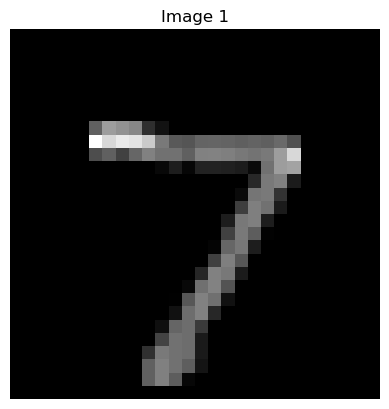

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This digit is probably a 7


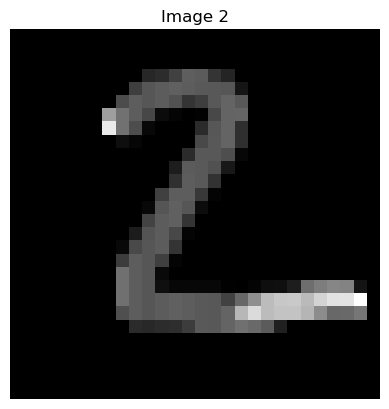

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This digit is probably a 2


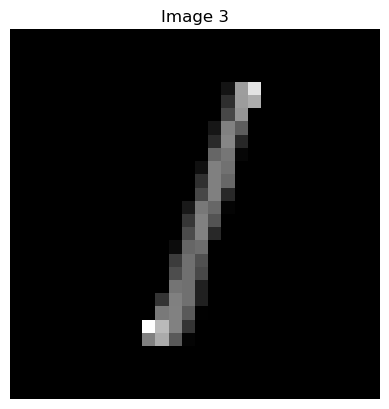

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This digit is probably a 1


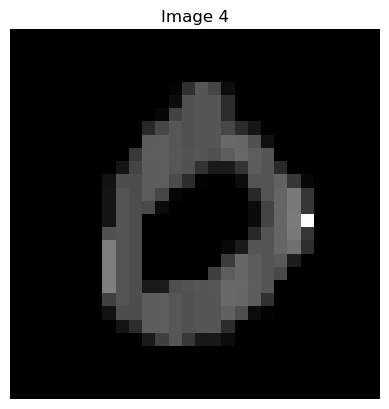

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This digit is probably a 0


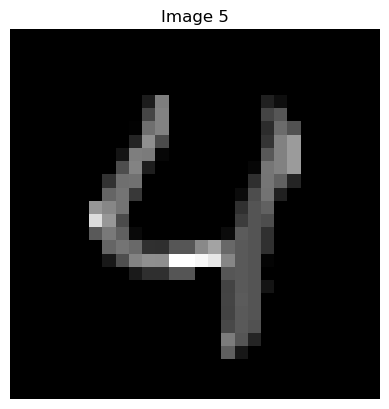

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This digit is probably a 4


In [46]:
top_5_test_data = x_test[:5]
for i in range(5):
    plt.imshow(top_5_test_data[i], cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.axis('off')
    plt.show()
    prediction = model.predict(np.expand_dims(top_5_test_data[i], axis=0))
    predicted_label = np.argmax(prediction)
    print(f"This digit is probably a {predicted_label}")